# **Aprendizaje supervisado**
# SL16. Tarea Final

A continuación se entregan una serie de datasets. Para cada uno de ellos construya uno o varios modelos de aprendizaje supervisado.

## <font color='blue'>**Set de Datos Boston Housing**</font>

El objetivo es poder predecir a nivel de negocio, el valor promedio de una propiedad en miles de dólares (US$1000) en la ciudad de Boston y que corresponde a la variable **MEDV**.

Informacion de los atributos   
1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per \$10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT    \% lower status of the population
14. MEDV     Median value of owner-occupied homes in \$1000's (target)

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import linear_model
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Lee un archivo CSV directamente de una URL y guarda los resultados
url='https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
names=['CRIM','ZN','INDUS','CHAS','NOS','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df = pd.read_csv(url,delimiter='\s+', header=None, names=names)
#data = pd.read_csv(url,delim_whitespace=True, header = None)

# Muestra las 5 primeras filas
df.head()

,CRIM,ZN,INDUS,CHAS,NOS,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


1. Realice 3 visualizaciones con los datos.

La variable a predecir es **MEDV** -> Median value of owner-occupied homes in $1000's (target)

1.1. Hagamos estadistica descriptiva de la matriz de datos

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOS,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


1.2. Comprobar que todas son variables númericas, no hay valores perdidos ni nulos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOS      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOS        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

1.3. Calculemos la matrix de correlaciónn y Grafiquemos las 3 visualizaciones con mayor correlación

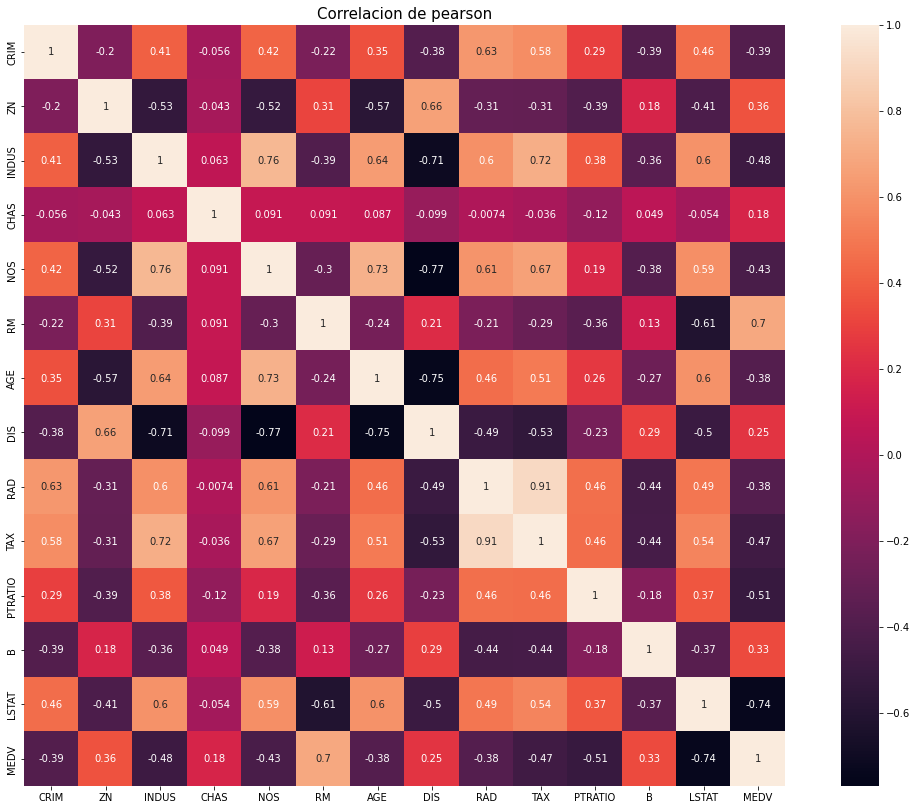

In [ ]:
# df.corr()
plt.figure(figsize=(20,14))
plt.title('Correlacion de pearson', size = 15)
sns.heatmap(df.corr(),
            square = True,
            annot = True)
plt.show()

Se selecciona unas variables correlacionadas de forma positiva, negativa y una cercana a nula.
- 0.70 -> Variable RM (average number of rooms per dwelling)
- -0.74 -> Variable LSTAT (% lower status of the population)
- 0.18 -> Variable CHAS (Charles River dummy variable (= 1 if tract bounds river; 0 otherwise))

In [ ]:
corr_0 = df[['RM','MEDV']].corr().values[0,1]
corr_1 = df[['LSTAT','MEDV']].corr().values[0,1]
corr_2 = df[['CHAS','MEDV']].corr().values[0,1]

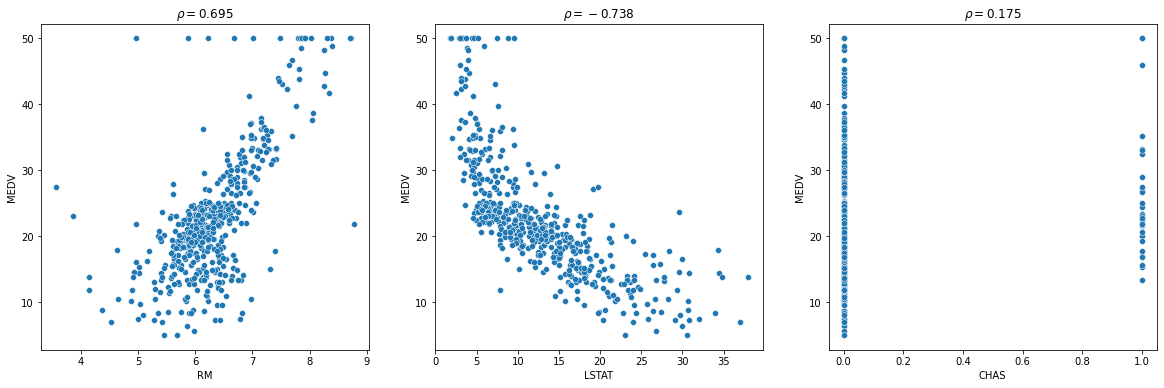

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(20,6))

sns.scatterplot(df['RM'], df['MEDV'], ax = ax[0])
ax[0].set_title(f'$\\rho = {corr_0:.3f}$')
sns.scatterplot(df['LSTAT'], df['MEDV'], ax = ax[1])
ax[1].set_title(f'$\\rho = {corr_1:.3f}$')
sns.scatterplot(df['CHAS'], df['MEDV'], ax = ax[2])
ax[2].set_title(f'$\\rho = {corr_2:.3f}$')

plt.show()

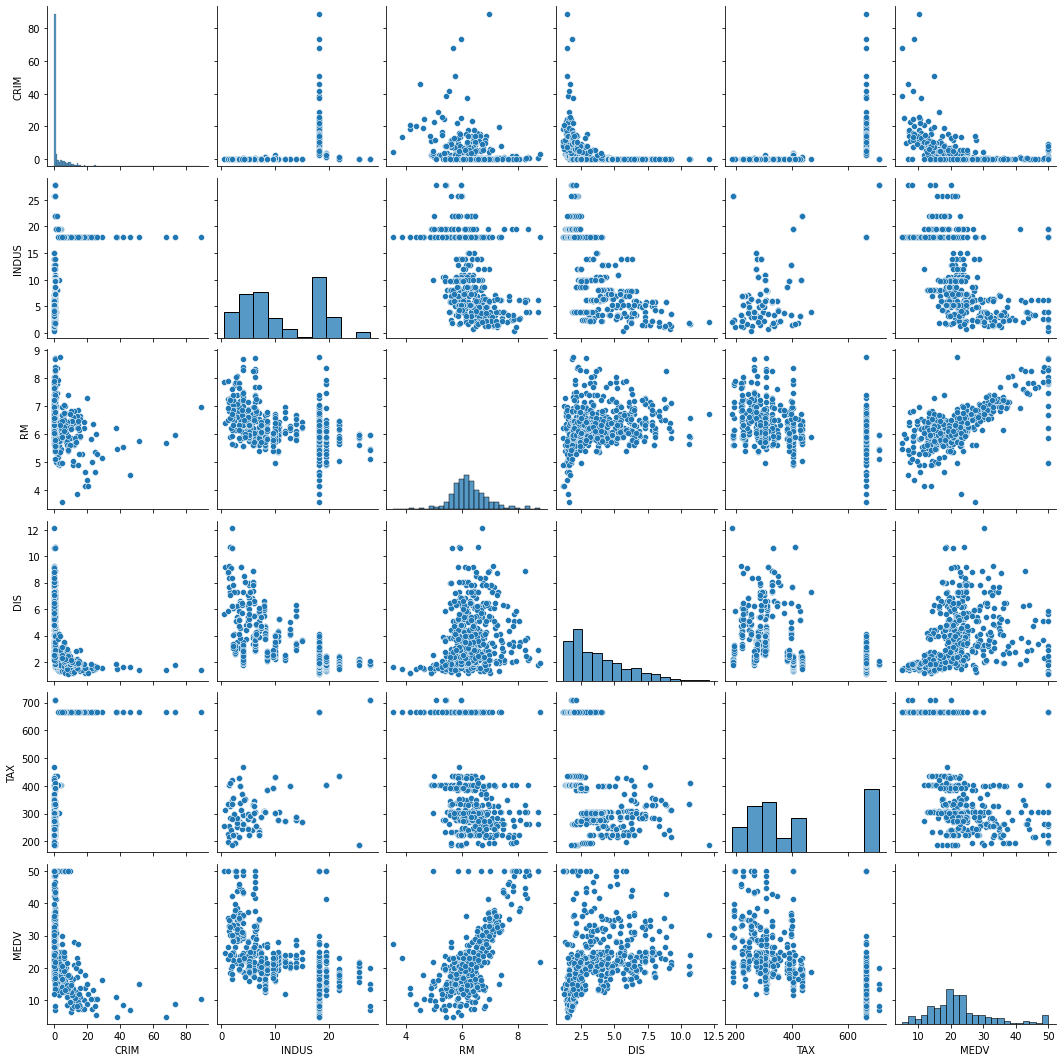

In [ ]:
sns.pairplot(df[['CRIM', 'INDUS', 'RM', 'DIS', 'TAX', 'MEDV']])

2. Pruebe todos los modelos disponibles para el problema de regresión. Reporte el F1 de 20 corridas experimentales con 5 fold cross validation.

**Observación: Dado que este es un problema de regresión no se puede reportar F1**

In [ ]:
# Como este es un problema de regresión, se utilizarán los siguientes modelos: (1) GLM, (2) SVP, (3) Ensemble Methods, (4) Decision Tree

X = df.drop(['MEDV'], axis = 1).values 
y = df['MEDV'] 


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

kf = RepeatedKFold(n_splits=5, n_repeats=20, random_state=101)

r2_LR, r2_DT, r2_RF, r2_GB = [], [], [], [] 
mae_LR, mae_DT, mae_RF, mae_GB = [], [], [], [] 

print(10*'----')    
print('Regresion lineal simple')
print(10*'----')    

model = LinearRegression(fit_intercept=True)

for k, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    #re entrenar el modelo
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    #estimate r2
    r2_value  = r2_score(y_test, y_pred)
    mae_value = mean_absolute_error(y_test, y_pred)
    print(f'Iteration #{k+1} : R-squared = {r2_value:.4f} / MAE = {mae_value}')
    r2_LR.append(r2_value)
    mae_LR.append(mae_value)
    print()

print(10*'----')    
print('Regresion de RandomForestRegressor')
print(10*'----')    

model = RandomForestRegressor(200)

for k, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    #re entrenar el modelo
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    #estimate r2
    r2_value  = r2_score(y_test, y_pred)
    mae_value = mean_absolute_error(y_test, y_pred)
    print(f'Iteration #{k+1} : R-squared = {r2_value:.4f} / MAE = {mae_value}')
    r2_RF.append(r2_value)
    mae_RF.append(mae_value)
    print()

print(10*'----')    
print('Regresion de GradientBoostingRegressor')
print(10*'----')    

# param_grid = {'learning_rate': [0.1, 0.01, 0.001],
#               'max_depth': [4, 6],
#               'min_samples_leaf': [3, 5],  ## depends on the nr of training examples
#                'max_features': [1.0, 0.3, 0.1] ## not possible in our example (only 1 fx)
#               }

model = GradientBoostingRegressor(n_estimators=100, max_depth=3, loss='ls')

for k, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    #re entrenar el modelo
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    #estimate r2
    r2_value  = r2_score(y_test, y_pred)
    mae_value = mean_absolute_error(y_test, y_pred)
    print(f'Iteration #{k+1} : R-squared = {r2_value:.4f} / MAE = {mae_value}')
    r2_GB.append(r2_value)
    mae_GB.append(mae_value)
    print()

print(10*'----')    
print('Regresion de DecisionTreeRegressor')
print(10*'----')    

model = DecisionTreeRegressor(max_depth=3)

for k, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    #re entrenar el modelo
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    #estimate r2
    r2_value  = r2_score(y_test, y_pred)
    mae_value = mean_absolute_error(y_test, y_pred)
    print(f'Iteration #{k+1} : R-squared = {r2_value:.4f} / MAE = {mae_value}')
    r2_DT.append(r2_value)
    mae_DT.append(mae_value)
    print()


----------------------------------------
Regresion lineal simple
----------------------------------------
Iteration #1 : R-squared = 0.7035 / MAE = 3.9994042530538683

Iteration #2 : R-squared = 0.7091 / MAE = 3.717394483045453

Iteration #3 : R-squared = 0.6295 / MAE = 3.002746898317992

Iteration #4 : R-squared = 0.7780 / MAE = 3.244373822318176

Iteration #5 : R-squared = 0.6851 / MAE = 3.2882576593907045

Iteration #6 : R-squared = 0.7647 / MAE = 3.398257825617477

Iteration #7 : R-squared = 0.7129 / MAE = 3.799071764361067

Iteration #8 : R-squared = 0.6139 / MAE = 3.7796945121752232

Iteration #9 : R-squared = 0.7551 / MAE = 3.1939286492264105

Iteration #10 : R-squared = 0.6882 / MAE = 3.1349370088153705

Iteration #11 : R-squared = 0.6845 / MAE = 3.8091000245191085

Iteration #12 : R-squared = 0.7346 / MAE = 3.197878203542507

Iteration #13 : R-squared = 0.6884 / MAE = 3.8742372086060963

Iteration #14 : R-squared = 0.7442 / MAE = 2.828874855479106

Iteration #15 : R-squared = 

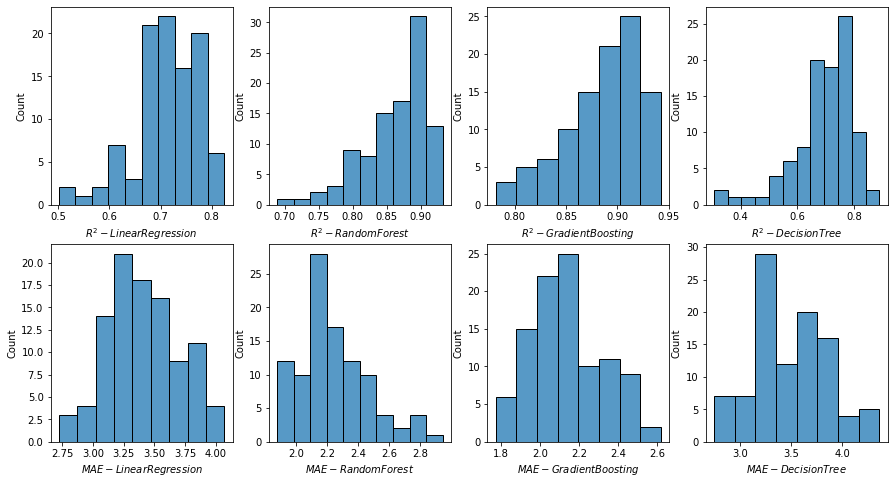

In [ ]:
# Resumen de resultados para cada modelo y reporte

fig, ax = plt.subplots(2,4, figsize=(15, 8))

sns.histplot(r2_LR, ax = ax[0,0])
ax[0,0].set_xlabel('$R^2 - LinearRegression$')
sns.histplot(r2_RF, ax = ax[0,1])
ax[0,1].set_xlabel('$R^2 - RandomForest$')
sns.histplot(r2_GB, ax = ax[0,2])
ax[0,2].set_xlabel('$R^2 - GradientBoosting$')
sns.histplot(r2_DT, ax = ax[0,3])
ax[0,3].set_xlabel('$R^2 - DecisionTree$')

sns.histplot(mae_LR, ax = ax[1,0])
ax[1,0].set_xlabel('$MAE - LinearRegression$')
sns.histplot(mae_RF, ax = ax[1,1])
ax[1,1].set_xlabel('$MAE - RandomForest$')
sns.histplot(mae_GB, ax = ax[1,2])
ax[1,2].set_xlabel('$MAE - GradientBoosting$')
sns.histplot(mae_DT, ax = ax[1,3])
ax[1,3].set_xlabel('$MAE - DecisionTree$')

plt.show()

In [ ]:
# crear vector ordenando los modelos 

d = {'Modelo': ['LinearRegression','RandomForest','GradientBoosting','DecisionTree'], 
      'mean_r2': [np.mean(r2_LR), np.mean(r2_RF), np.mean(r2_GB), np.mean(r2_DT)], 
      'std_r2': [np.std(r2_LR), np.std(r2_RF), np.std(r2_GB), np.std(r2_DT)], 
      'mean_mae': [np.mean(mae_LR), np.mean(mae_RF), np.mean(mae_GB), np.mean(mae_DT)],
      'std_mae': [np.std(mae_LR), np.std(mae_RF), np.std(mae_GB), np.std(mae_DT)] }
model_scoring = pd.DataFrame(data=d)
model_scoring


,Modelo,mean_r2,std_r2,mean_mae,std_mae
0,LinearRegression,0.711853,0.063318,3.409717,0.284727
1,RandomForest,0.862426,0.047529,2.237835,0.220710
2,GradientBoosting,0.883660,0.037074,2.136600,0.189701
3,DecisionTree,0.695538,0.106377,3.497395,0.359307


El mejor modelo según el indicador R^2 es:

In [ ]:
model_scoring.sort_values(by=['mean_r2'], ascending=False)

,Modelo,mean_r2,std_r2,mean_mae,std_mae
2,GradientBoosting,0.883660,0.037074,2.136600,0.189701
1,RandomForest,0.862426,0.047529,2.237835,0.220710
0,LinearRegression,0.711853,0.063318,3.409717,0.284727
3,DecisionTree,0.695538,0.106377,3.497395,0.359307


## <font color='blue'>**Set de Datos Fake News**</font>

Inspiración
¿Se puede usar este dataset para generar un algoritmo que identifique "fake news" y "real news"?

https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset

**Referencias** 

*   Ahmed H, Traore I, Saad S. “Detecting opinion spams and fake news using text classification”, Journal of Security and Privacy, Volume 1, Issue 1, Wiley, January/February 2018.
*   Ahmed H, Traore I, Saad S. (2017) “Detection of Online Fake News Using N-Gram Analysis and Machine Learning Techniques. In: Traore I., Woungang I., Awad A. (eds) Intelligent, Secure, and Dependable Systems in Distributed and Cloud Environments. ISDDC 2017. Lecture Notes in Computer Science, vol 10618. Springer, Cham (pp. 127-138).






Revise los datos que se encuentran en el archivo **Dataset_fakenews.zip**. Realice un analisis descriptivo de los datos, genere las transformaciones necesarias para preparar su dataset para algoritmos de clasificacion y pruebe con todos los modelos de clasificacion revisados en clases. Optimice los parametros de su algoritmo y reporte el F1 de 20 corridas experimentales con 5 fold cross validation. 

Explique sus decisiones, genere visualizaciones y conclusiones.

In [ ]:
# Solución
# Este es un problema de clasificación (en este caso, binario)

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/05_ApendizajeSupervisado/files'

df_real = pd.read_csv(path+'/True.csv')
df_fake = pd.read_csv(path+'/Fake.csv')

df_real.head(5)


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
print(df_real.shape)
print(df_fake.shape)

(21417, 4)
(23481, 4)


In [ ]:
df_real.info()
print(10*'------')
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


Existe una cantidad similar de mensajes "real" y "fake". Se agregará una columna dummy que indique si es real (=0) o fake (=1). Luego se combina todo en un único database

In [ ]:
df_real['fake_new'] = 0
print(df_real[0:5])

df_fake['fake_new'] = 1
print(df_fake[0:5])

                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  fake_new  
0  December 31, 2017          0  
1  December 29, 2017          0  
2  December 31, 2017          0  
3  December 30, 2017          0  
4  December 29, 2017          0  
                                      

In [ ]:
df = pd.concat([df_real, df_fake], axis = 0)
df.sample(5)

,title,text,subject,date,fake_new
1656,Pelosi calls DACA deal a first step toward com...,WASHINGTON (Reuters) - U.S. House of Represent...,politicsNews,"September 20, 2017",0
1225,"James Comey Just Called Trump A Liar, And The...",As former FBI Director James Comey gave his te...,News,"June 8, 2017",1
4550,How Trump Is Hiding From The Media Like A Tot...,Donald Trump has a reputation in the media for...,News,"September 20, 2016",1
11327,PRESIDENT TRUMP’S HARD LINE ON BORDER SECURITY...,THE COMPLETE LIST IS AT THE LINK ABOVE BUT THE...,politics,"Mar 23, 2017",1
18390,BRAINWASHED CHILDREN MOCK President Trump in D...,A disturbing video published by The Washington...,left-news,"Jul 3, 2017",1


In [ ]:
df['subject'].unique()

array(['politicsNews', 'worldnews', 'News', 'politics', 'Government News',
       'left-news', 'US_News', 'Middle-east'], dtype=object)

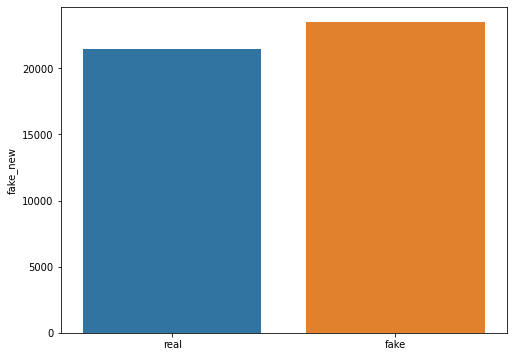

In [ ]:
plt.figure(figsize = (8,6))
ax = sns.barplot(df['fake_new'].value_counts().index, df['fake_new'].value_counts())
ax.set_xticklabels(['real', 'fake'])
plt.show()

Se trabajará con todo el dataset considerando todas las topicos de noticias (probablemente discriminando por tipo de noticia se puede obtener mejores resultados). 

Por lo tanto, solo nos quedaremos con las columnas "target" (=fake_new) y el texto del mensaje. 

In [ ]:
df.drop(['title', 'date', 'subject'], axis = 1, inplace=True)
df.head(5)

,text,fake_new
0,WASHINGTON (Reuters) - The head of a conservat...,0
1,WASHINGTON (Reuters) - Transgender people will...,0
2,WASHINGTON (Reuters) - The special counsel inv...,0
3,WASHINGTON (Reuters) - Trump campaign adviser ...,0
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,0


Tal y como vimos en el notebook SL07, para utilizar estos datos para el aprendizaje automático, necesitamos poder convertir el contenido de cada cadena en un vector de números. Para esto usaremos el vectorizador TF-IDF, 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# from sklearn.pipeline import make_pipeline

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, roc_auc_score, f1_score, accuracy_score, accuracy_score, auc, roc_curve
from sklearn.metrics import make_scorer


In [ ]:
tfidf = TfidfVectorizer()
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['fake_new'], test_size=0.30)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)
X_train_tfidf

<31428x105919 sparse matrix of type '<class 'numpy.float64'>'
	with 6584835 stored elements in Compressed Sparse Row format>

In [ ]:
#construimos c/u de los modelos y los entrenamos

model_MNB = MultinomialNB()
model_MNB.fit(X_train_tfidf, y_train)

model_SVC = LinearSVC()
model_SVC.fit(X_train_tfidf, y_train)


LinearSVC()

In [ ]:
model_RF = RandomForestClassifier()
# model_RF.fit(X_train_tfidf, y_train)

param_grid = {'n_estimators': [10, 100, 1000],
              'max_depth': [1, 5, 10],
              'min_samples_split': [2, 4, 6]}
f1 = make_scorer(f1_score , average='macro')

grid_RF = GridSearchCV(model_RF, param_grid, scoring=f1, n_jobs=4)
grid_RF.fit(X_train_tfidf, y_train)
print(grid_RF.best_params_)


{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 1000}


In [ ]:
model_GB = GradientBoostingClassifier()
model_GB.fit(X_train_tfidf, y_train)

param_grid = {'n_estimators': [10, 100]}#, 1000],
              # 'max_depth': [1, 5, 10],
              # 'min_samples_split': [2, 4, 6]}
f1 = make_scorer(f1_score , average='macro')

grid_GB = GridSearchCV(model_GB, param_grid, scoring=f1, n_jobs=4)
grid_GB.fit(X_train_tfidf, y_train)


GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=4,
             param_grid={'n_estimators': [10, 100]},
             scoring=make_scorer(f1_score, average=macro))

In [ ]:
print(grid_GB.best_params_)

{'n_estimators': 100}


In [ ]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train_tfidf, y_train)

param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [1, 5, 10],
              'min_samples_split': [2, 4, 6]}
f1 = make_scorer(f1_score , average='macro')

grid_DT = GridSearchCV(model_DT, param_grid, scoring=f1, n_jobs=4)
grid_DT.fit(X_train_tfidf, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 5, 10],
                         'min_samples_split': [2, 4, 6]},
             scoring=make_scorer(f1_score, average=macro))

In [ ]:
print(grid_DT.best_params_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}


Ahora analizamos con KFold con los mejores parametros

In [ ]:
from sklearn.model_selection import RepeatedKFold

kf = RepeatedKFold(n_splits=5, n_repeats=20, random_state=101)

acc_MNB, acc_SVC, acc_RF, acc_GB, acc_DT = [], [], [], [], []
F1_MNB, F1_SVC, F1_RF, F1_GB, F1_DT = [], [], [], [], []

X = df['text']
y = df['fake_new']

X_tfidf = tfidf.fit_transform(X)
y = y.values

for k, (train_index, test_index) in enumerate(kf.split(X_tfidf, y)):
    X_train_tfidf, X_test_tfidf = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = y[train_index], y[test_index]

    print(10*'----')    
    print('Clasificación MultinomialNB')
    print(10*'----')    
    #re entrenar el modelo
    model_MNB.fit(X_train_tfidf, y_train)
    y_pred = model_MNB.predict(X_test_tfidf)

    acc_value  = accuracy_score(y_test, y_pred)
    F1_value = f1_score(y_test, y_pred)
    print(f'Iteration #{k+1} : Acurracy = {acc_value:.4f} / F1_value = {F1_value}')
    acc_MNB.append(acc_value)
    F1_MNB.append(F1_value)
    print()

    print(10*'----')    
    print('Clasificación LinearSVC')
    print(10*'----')    
    model_SVC.fit(X_train_tfidf, y_train)
    y_pred = model_SVC.predict(X_test_tfidf)
    acc_value  = accuracy_score(y_test, y_pred)
    F1_value = f1_score(y_test, y_pred)
    print(f'Iteration #{k+1} : Acurracy = {acc_value:.4f} / F1_value = {F1_value}')
    acc_SVC.append(acc_value)
    F1_SVC.append(F1_value)
    print()

    print(10*'----')    
    print('Clasificación RandomForestClassifier')
    print(10*'----')    
    model_RF = RandomForestClassifier(max_depth= 10, min_samples_split= 2, n_estimators= 10) #el optimo es 1000, se dejo en 10 por el tiempo de procesamiento
    model_RF.fit(X_train_tfidf, y_train)
    y_pred = model_RF.predict(X_test_tfidf)
    acc_value  = accuracy_score(y_test, y_pred)
    F1_value = f1_score(y_test, y_pred)
    print(f'Iteration #{k+1} : Acurracy = {acc_value:.4f} / F1_value = {F1_value}')
    acc_RF.append(acc_value)
    F1_RF.append(F1_value)
    print()

    print(10*'----')    
    print('Clasificación GradientBoostingClassifier')
    print(10*'----')    
    model_GB = GradientBoostingClassifier(n_estimators= 10) #el optimo es 100, se dejo en 10 por el tiempo de procesamiento
    model_GB.fit(X_train_tfidf, y_train)
    y_pred = model_GB.predict(X_test_tfidf)
    acc_value  = accuracy_score(y_test, y_pred)
    F1_value = f1_score(y_test, y_pred)
    print(f'Iteration #{k+1} : Acurracy = {acc_value:.4f} / F1_value = {F1_value}')
    acc_GB.append(acc_value)
    F1_GB.append(F1_value)
    print()

    print(10*'----')    
    print('Clasificación DecisionTreeClassifier')
    print(10*'----')    
    model_DT = DecisionTreeClassifier(criterion= 'gini', max_depth= 10, min_samples_split= 2)
    model_DT.fit(X_train_tfidf, y_train)
    y_pred = model_DT.predict(X_test_tfidf)
    acc_value  = accuracy_score(y_test, y_pred)
    F1_value = f1_score(y_test, y_pred)
    print(f'Iteration #{k+1} : Acurracy = {acc_value:.4f} / F1_value = {F1_value}')
    acc_DT.append(acc_value)
    F1_DT.append(F1_value)
    print()


----------------------------------------
Clasificación MultinomialNB
----------------------------------------
Iteration #1 : Acurracy = 0.9337 / F1_value = 0.9368700265251989

----------------------------------------
Clasificación LinearSVC
----------------------------------------
Iteration #1 : Acurracy = 0.9949 / F1_value = 0.995050570260383

----------------------------------------
Clasificación RandomForestClassifier
----------------------------------------
Iteration #1 : Acurracy = 0.8808 / F1_value = 0.8881221246340442

----------------------------------------
Clasificación GradientBoostingClassifier
----------------------------------------
Iteration #1 : Acurracy = 0.9943 / F1_value = 0.9944894651539709

----------------------------------------
Clasificación DecisionTreeClassifier
----------------------------------------
Iteration #1 : Acurracy = 0.9955 / F1_value = 0.9956887260185384

----------------------------------------
Clasificación MultinomialNB
-------------------------

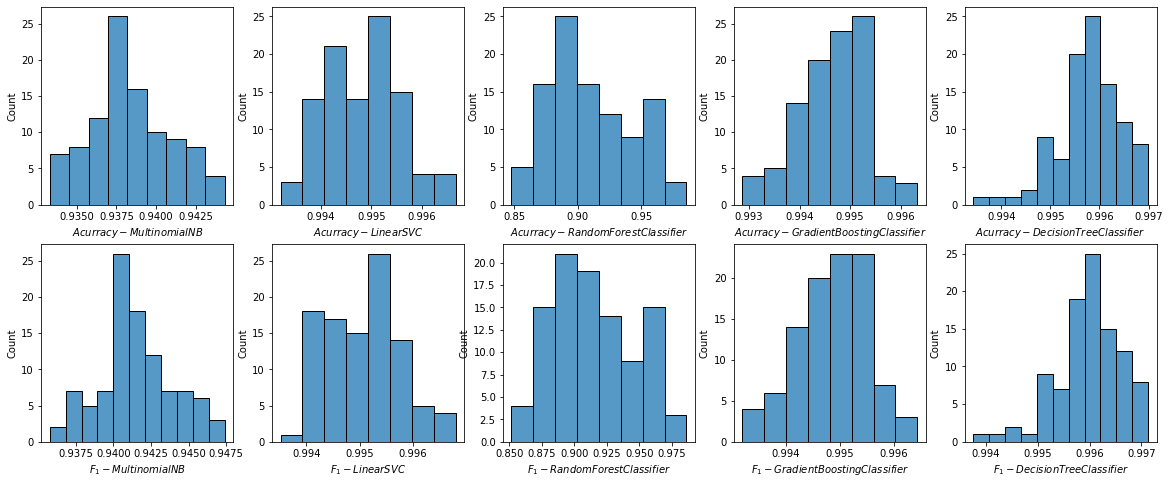

In [ ]:
# Resumen de resultados para cada modelo y reporte

fig, ax = plt.subplots(2,5, figsize=(20, 8))

sns.histplot(acc_MNB, ax = ax[0,0])
ax[0,0].set_xlabel('$Acurracy - MultinomialNB$')
sns.histplot(acc_SVC, ax = ax[0,1])
ax[0,1].set_xlabel('$Acurracy - LinearSVC$')
sns.histplot(acc_RF, ax = ax[0,2])
ax[0,2].set_xlabel('$Acurracy - RandomForestClassifier$')
sns.histplot(acc_GB, ax = ax[0,3])
ax[0,3].set_xlabel('$Acurracy - GradientBoostingClassifier$')
sns.histplot(acc_DT, ax = ax[0,4])
ax[0,4].set_xlabel('$Acurracy - DecisionTreeClassifier$')

sns.histplot(F1_MNB, ax = ax[1,0])
ax[1,0].set_xlabel('$F_1  - MultinomialNB$')
sns.histplot(F1_SVC, ax = ax[1,1])
ax[1,1].set_xlabel('$F_1 - LinearSVC$')
sns.histplot(F1_RF, ax = ax[1,2])
ax[1,2].set_xlabel('$F_1 - RandomForestClassifier$')
sns.histplot(F1_GB, ax = ax[1,3])
ax[1,3].set_xlabel('$F_1 - GradientBoostingClassifier$')
sns.histplot(F1_DT, ax = ax[1,4])
ax[1,4].set_xlabel('$F_1 - DecisionTreeClassifier$')

plt.show()

In [ ]:
# crear vector ordenando los modelos 

d = {'Modelo': ['MultinomialNB','LinearSVC','RandomForestClassifier','GradientBoostingClassifier', 'DecisionTreeClassifier'], 
      'mean_accuracy': [np.mean(acc_MNB), np.mean(acc_SVC), np.mean(acc_RF), np.mean(acc_GB), np.mean(acc_DT)], 
      'std_accuracy': [np.std(acc_MNB), np.std(acc_SVC), np.std(acc_RF), np.std(acc_GB), np.std(acc_DT)], 
      'mean_F1': [np.mean(F1_MNB), np.mean(F1_SVC), np.mean(F1_RF), np.mean(F1_GB), np.mean(F1_DT)],
      'std_F1': [np.std(F1_MNB), np.std(F1_SVC), np.std(F1_RF), np.std(F1_GB), np.std(F1_DT)] }
model_scoring = pd.DataFrame(data=d)
model_scoring


,Modelo,mean_accuracy,std_accuracy,mean_F1,std_F1
0,MultinomialNB,0.938302,0.002486,0.941512,0.002468
1,LinearSVC,0.994843,0.000721,0.995071,0.000682
2,RandomForestClassifier,0.910632,0.032560,0.914428,0.031656
3,GradientBoostingClassifier,0.994671,0.000670,0.994888,0.000646
4,DecisionTreeClassifier,0.995814,0.000673,0.995993,0.000643


El mejor modelo según F1 es:

In [ ]:
model_scoring.sort_values(by=['mean_F1'], ascending=False)

,Modelo,mean_accuracy,std_accuracy,mean_F1,std_F1
4,DecisionTreeClassifier,0.995814,0.000673,0.995993,0.000643
1,LinearSVC,0.994843,0.000721,0.995071,0.000682
3,GradientBoostingClassifier,0.994671,0.000670,0.994888,0.000646
0,MultinomialNB,0.938302,0.002486,0.941512,0.002468
2,RandomForestClassifier,0.910632,0.032560,0.914428,0.031656


Matriz de confusión para modelo con mejor desempeño

In [ ]:
model_DT = DecisionTreeClassifier(criterion= 'gini', max_depth= 10, min_samples_split= 2)
model_DT.fit(X_train_tfidf, y_train)
y_pred = model_DT.predict(X_test_tfidf)

report = classification_report(y_test, y_pred, target_names= ['real', 'fake'])

print(report)


              precision    recall  f1-score   support

        real       1.00      1.00      1.00      4302
        fake       1.00      1.00      1.00      4677

    accuracy                           1.00      8979
   macro avg       1.00      1.00      1.00      8979
weighted avg       1.00      1.00      1.00      8979



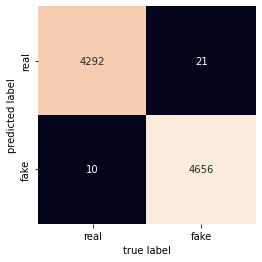

In [ ]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['real', 'fake'], yticklabels=['real', 'fake'])
plt.xlabel('true label')
plt.ylabel('predicted label');

## <font color='blue'>**Set de Datos Tarjetas de Créditos**</font>

Utilizaremos un conjunto de datos real de transacciones anónimas con tarjetas de crédito realizadas por titulares de tarjetas europeos a partir de septiembre de 2013. Estas transacciones están etiquetadas como fraudulentas o genuinas, y el objetivo es crear una solución de detección de fraudes utilizando el aprendizaje automático para predecir las etiquetas correctas para nuevas instancias.
Este conjunto de datos está muy desequilibrado. De las 284.807 transacciones, solo 492 son fraudulentas (0,172%). Este bajo porcentaje de fraude es bastante típico de las transacciones con tarjeta de crédito. Hay 28 variables, todas ellas numéricas, y no hay variables categóricas. Estas variables no son las características originales, sino el resultado de un análisis de componentes principales.

Para lidiar con datasets desbalanceados se recomienda utilizar la libreria imblearn. En ella hay varios metodos para balancear los datos. Existe un método de submuestreo y otro de sobremuestreo (SMOTE). 

In [ ]:
import imblearn
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

Path = '/content/drive/MyDrive/Curso 5 - Aprendizaje Supervisado/files/'
ccard = pd.read_table(Path + "credit_card.txt", header=0, delimiter=',')
ccard.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
ccard.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
ccard_column = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 
               'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 
               'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
ccard_target = ['Class']


Transacciones de tarjetas de credito
Validas:    284315
Fraude :       492
Total  :    284807


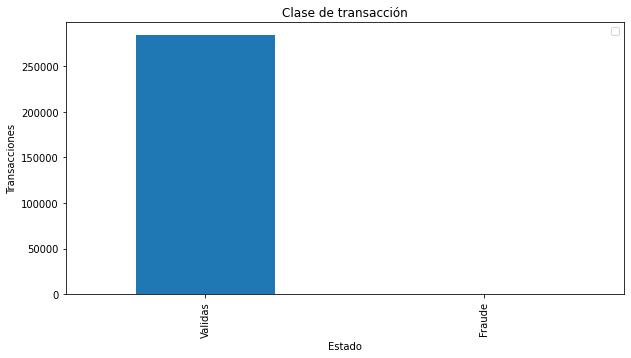

In [ ]:
# Distribución de transacciones de tarjetas de credito
class_label = ['Validas', 'Fraude']
class_counts = ccard['Class'].value_counts()

print(f'Transacciones de tarjetas de credito')
print(f'Validas: {class_counts[0]:9}')
print(f'Fraude : {class_counts[1]:9}')
print(f'Total  : {class_counts.sum():9}')

class_counts.plot(kind='bar', figsize=(10,5))
plt.title('Clase de transacción')
plt.xlabel('Estado')
plt.ylabel('Transacciones')
plt.xticks(ticks=[0, 1], labels=class_label)
plt.legend('Validas', 'Fraude')
plt.grid(False)
plt.show()


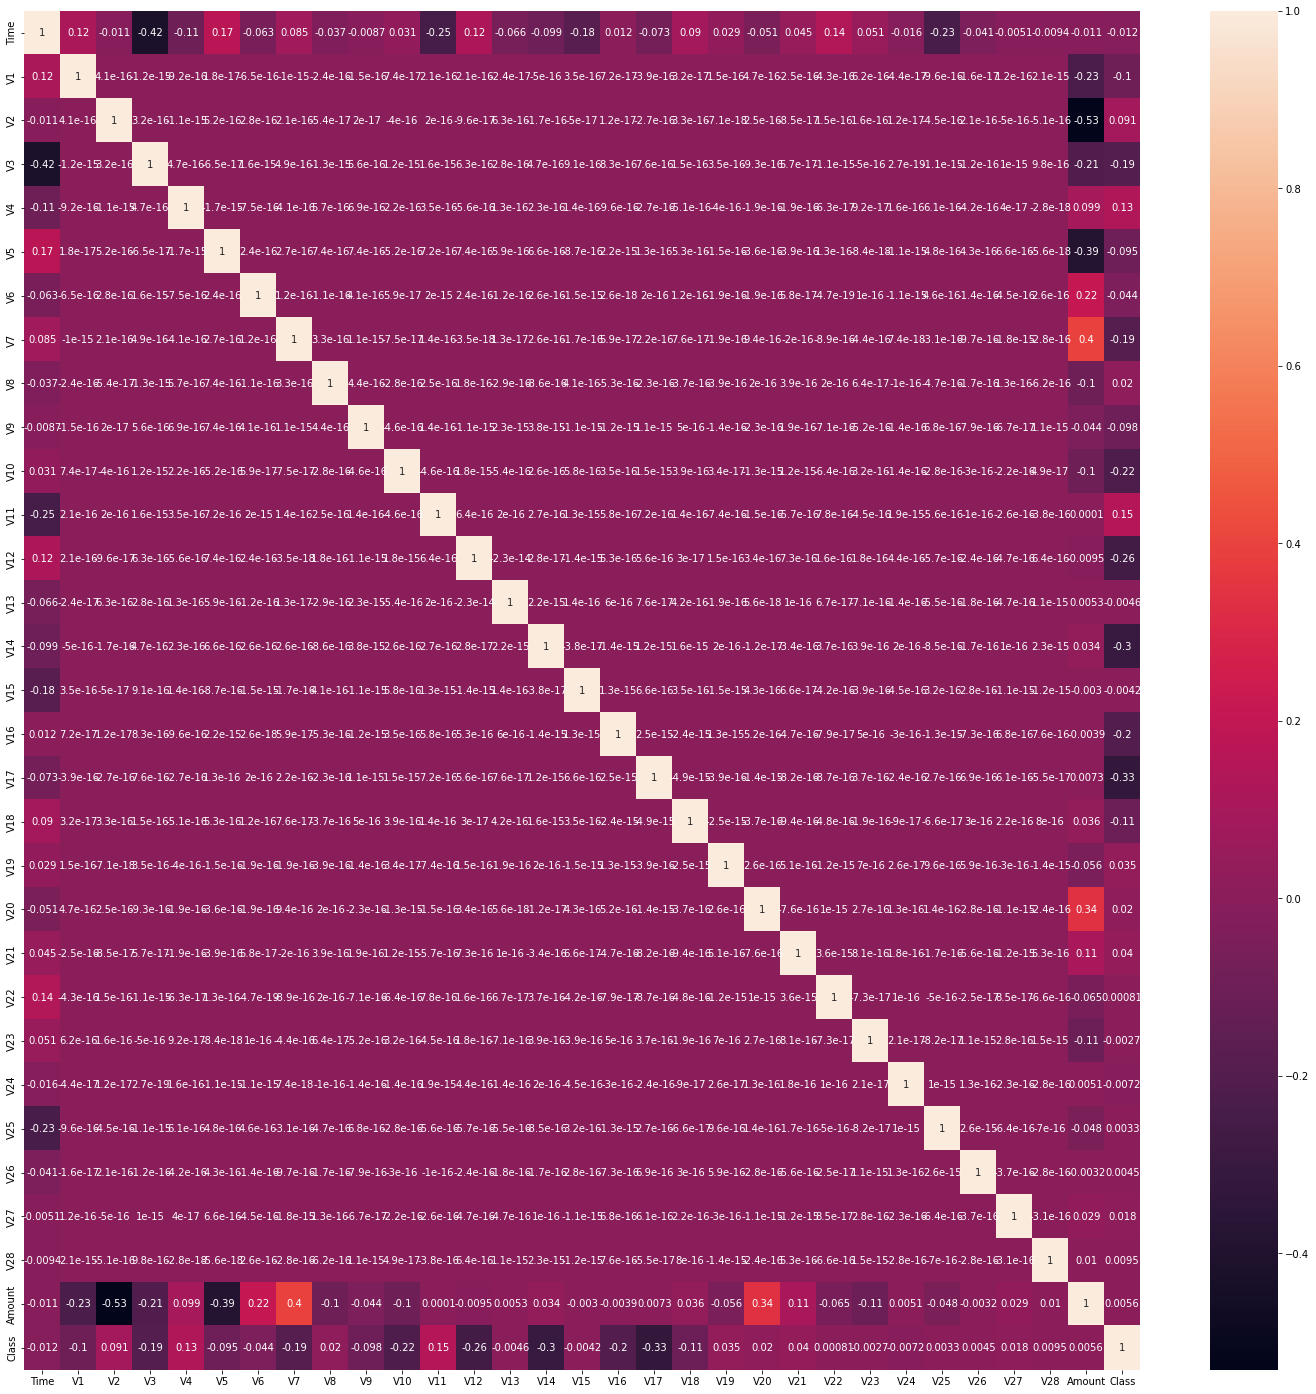

In [ ]:
# Mapa de calor
plt.figure(figsize=(25,25))
sns.heatmap(ccard.corr(), annot=True)  
plt.show()

In [ ]:
plt.figure(figsize=(25,25))
sns.pairplot(data=ccard, corner=True)  
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek

# Valores a considear
ccard_X = ccard[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 
                 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 
                 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']].values
ccard_y = ccard['Class'].values

#Etiquetas
class_label = ['Validas', 'Fraude']


In [ ]:
# clasificador de regresión logistica
def fn_logistic_clf(X_train, X_test, y_train, y_test):
    logistic_clf = LogisticRegression(C=1.0, penalty='l2', random_state=1, solver="newton-cg")
    logistic_clf.fit(X_train, y_train)
    return logistic_clf


In [ ]:
# Graficar matriz de confución
def fn_matriz_confusion(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)

    # graficar
    plt.figure(figsize=(7, 7))
    sns.heatmap(conf_matrix, xticklabels=class_label, yticklabels=class_label, annot=True, fmt="d");
    plt.title('Matrix de confusión datos desbalanceados')
    plt.ylabel('Real')
    plt.xlabel('Predicción')
    plt.show()

    # reporte de clasificación
    print('                                                            ')
    print('               Reporte de clasificación                     ')
    print('************************************************************')
    print(classification_report(y_test, pred_y))


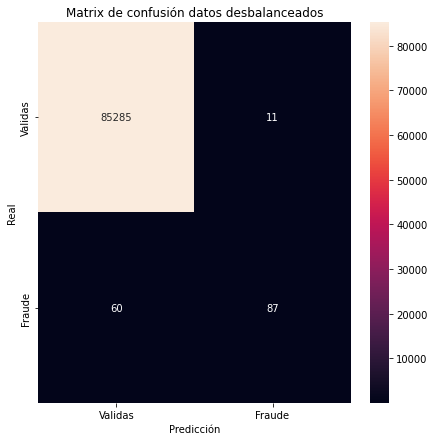

                                                            
               Reporte de clasificación                     
************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.89      0.59      0.71       147

    accuracy                           1.00     85443
   macro avg       0.94      0.80      0.85     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
#**********************************************************************************
# Datos desbalanceados
#**********************************************************************************
# Separar entre muestras de entrenamiento y test
ccard_X_train, ccard_X_test, ccard_y_train, ccard_y_test = train_test_split(ccard_X, ccard_y, test_size=0.30, random_state=0)

# clasificar, estimar y graficar
clf_inicial = fn_logistic_clf(ccard_X_train, ccard_X_test, ccard_y_train, ccard_y_test)
ccard_y_pred = clf_inicial.predict(ccard_X_test)
fn_matriz_confusion(ccard_y_test, ccard_y_pred)


Observación :

Tenemos 60 falsos positivos, que se detectaron como validos y eran fraudes y 87 aciertos reales, que se predijeron como fraude y efectivamente lo eran.

recall de 65 se puede mejorar.

f1-score de 71, pero el modelo no detecta correctamente los fraudes, porque los datos estan fuertemente desbalanceados.





                     Sub Muestreo                           
************************************************************
Distribución antes de resampling (199364,)
Distribución despues de resampling (690,)
************************************************************


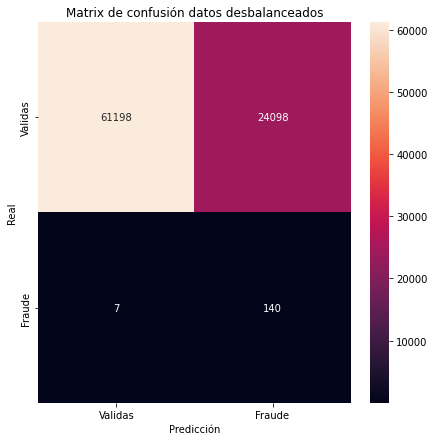

                                                            
               Reporte de clasificación                     
************************************************************
              precision    recall  f1-score   support

           0       1.00      0.72      0.84     85296
           1       0.01      0.95      0.01       147

    accuracy                           0.72     85443
   macro avg       0.50      0.83      0.42     85443
weighted avg       1.00      0.72      0.83     85443



In [ ]:
#**********************************************************************************
# Sub Muestreo 
#**********************************************************************************
# Separar entre muestras de entrenamiento y test
ccard_X_train, ccard_X_test, ccard_y_train, ccard_y_test = train_test_split(ccard_X, ccard_y, test_size=0.30, random_state=0)

# aplicar el submuetreo sobre la muestra de entrenamiento
us = NearMiss() #(ratio=0.5, n_neighbors=3, version=2, random_state=1)
ccard_X_train_res, ccard_y_train_res = us.fit_resample(ccard_X_train, ccard_y_train)
 
print(f'                     Sub Muestreo                           ')
print(f'************************************************************')
print(f'Distribución antes de resampling {ccard_y_train.shape}')
print(f'Distribución despues de resampling {ccard_y_train_res.shape}')
print(f'************************************************************')
 
# clasificar, estimar y graficar
clf_NearMiss = fn_logistic_clf(ccard_X_train_res, ccard_X_test, ccard_y_train_res, ccard_y_test)
ccard_y_pred = clf_NearMiss.predict(ccard_X_test)
fn_matriz_confusion(ccard_y_test, ccard_y_pred)



Mejora respecto al anterior 7 falsos positivos y 140 detecciones de fraude reales; pero se ha detectado como fraude 24098 transacciones que era validas.

El recall de 95 es mucho mejor 


                     Sobre Muestreo                         
************************************************************
Distribución antes de resampling (199364,)
Distribución despues de resampling (398038,)
************************************************************


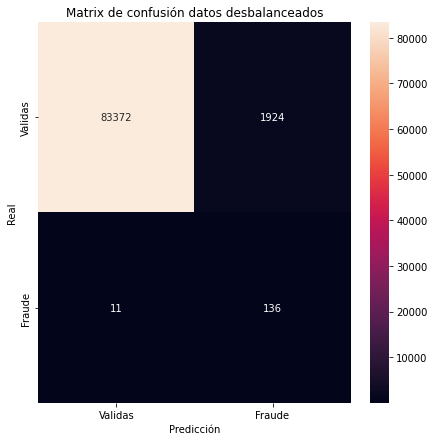

                                                            
               Reporte de clasificación                     
************************************************************
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.07      0.93      0.12       147

    accuracy                           0.98     85443
   macro avg       0.53      0.95      0.56     85443
weighted avg       1.00      0.98      0.99     85443



In [ ]:
#**********************************************************************************
# Sobre Muestreo
#**********************************************************************************
# Separar entre muestras de entrenamiento y test
ccard_X_train, ccard_X_test, ccard_y_train, ccard_y_test = train_test_split(ccard_X, ccard_y, test_size=0.30, random_state=0)

# aplicar el sobremuestreo sobre la muestra de entrenamiento
os = RandomOverSampler() #(ratio=0.5)
ccard_X_train_res, ccard_y_train_res = os.fit_resample(ccard_X_train, ccard_y_train)

print(f'                     Sobre Muestreo                         ')
print(f'************************************************************')
print(f'Distribución antes de resampling {ccard_y_train.shape}')
print(f'Distribución despues de resampling {ccard_y_train_res.shape}')
print(f'************************************************************')
 
# clasificar, estimar y graficar
clf_OverSampler = fn_logistic_clf(ccard_X_train_res, ccard_X_test, ccard_y_train_res, ccard_y_test)
ccard_y_pred = clf_OverSampler.predict(ccard_X_test)
fn_matriz_confusion(ccard_y_test, ccard_y_pred)


                 Sub y  Sobre Muestreo                      
************************************************************
Distribución antes de resampling (398038,)
Distribución despues de resampling (398038,)
************************************************************


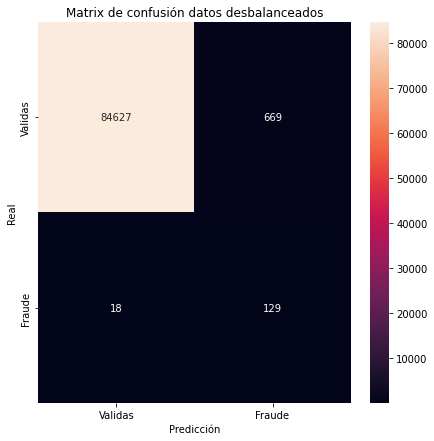

                                                            
               Reporte de clasificación                     
************************************************************
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85296
           1       0.16      0.88      0.27       147

    accuracy                           0.99     85443
   macro avg       0.58      0.93      0.63     85443
weighted avg       1.00      0.99      0.99     85443



In [ ]:
#**********************************************************************************
# Sub y Sobre Muestreo
#**********************************************************************************
# Separar entre muestras de entrenamiento y test
ccard_X_train, ccard_X_test, ccard_y_train, ccard_y_test = train_test_split(ccard_X, ccard_y, test_size=0.30, random_state=0)

# Over-sample
over = SMOTE(sampling_strategy='auto')
ccard_X_train, ccard_y_train = over.fit_resample(ccard_X_train, ccard_y_train)

# Under-sample
under = RandomUnderSampler(sampling_strategy='auto')
ccard_X_train_res, ccard_y_train_res = under.fit_resample(ccard_X_train, ccard_y_train)

print(f'                 Sub y  Sobre Muestreo                      ')
print(f'************************************************************')
print(f'Distribución antes de resampling {ccard_y_train.shape}')
print(f'Distribución despues de resampling {ccard_y_train_res.shape}')
print(f'************************************************************')
 
# clasificar, estimar y graficar
clf_OverSampler = fn_logistic_clf(ccard_X_train_res, ccard_X_test, ccard_y_train_res, ccard_y_test)
ccard_y_pred = clf_OverSampler.predict(ccard_X_test)
fn_matriz_confusion(ccard_y_test, ccard_y_pred)


La combinación de Sub y Sobre bajo un poco los falsos positivos y las detecciones correctas; pero si bajo significativamente las falsas detecciones de fraude de 24098 en el submuestreo a 695.

El recall dio un peor resultado, indicando que su capacidad para encontrar todas las instancias positivas, no fue la mejor.






In [ ]:



#**********************************************************************************
# Por probar
#**********************************************************************************
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.svm import LinearSVC
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.pipeline import make_pipeline


def plot_resampling(X, y, sampler, ax):
    """Plot the resampled dataset using the sampler."""
    X_res, y_res = sampler.fit_resample(X, y)
    ax.scatter(X_res[:, 0], X_res[:, 1], c=y_res, alpha=0.8, edgecolor="k")
    sns.despine(ax=ax, offset=10)
    ax.set_title(f"Decision function for {sampler.__class__.__name__}")
    return Counter(y_res)


    
def plot_decision_function(X, y, clf, ax):
    """Plot the decision function of the classifier and the original data"""
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor="k")
    ax.set_title(f"Resampling using {clf[0].__class__.__name__}")

In [ ]:

samplers = [SMOTE(random_state=0), SMOTEENN(random_state=0), SMOTETomek(random_state=0)]

# Graficar
fig, axs = plt.subplots(3, 2, figsize=(15, 25))
for ax, sampler in zip(axs, samplers):
    clf = make_pipeline(sampler, LinearSVC()).fit(X, y)
    plot_decision_function(X, y, clf, ax[0])
    plot_resampling(X, y, sampler, ax[1])
fig.tight_layout()

plt.show()



Funciones para Over y Subsampling.

In [ ]:
# Over-sample
over = SMOTE(sampling_strategy=0.1)
X, y = over.fit_resample(X, y)

# Under-sample
under = RandomUnderSampler(sampling_strategy=0.5)
X, y = under.fit_resample(X, y)


Pipeline en donde se hacen los 2 métodos a la vez. 

In [ ]:
# define pipeline
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X, y = pipeline.fit_resample(X, y)

# summarize the new class distribution
counter = Counter(y)
print(counter)